In [2]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import json

In [3]:
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('../../datasets/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('../../datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames,engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../../datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames,engine='python')

In [4]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = pd.merge(pd.merge(users, ratings), movies)
df.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
mt = df.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mt.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [9]:
gr_size = df.groupby('title').size()
gr_size

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [10]:
ai = gr_size[gr_size > 250].index

In [11]:
res = mt.loc[ai]
res.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


<AxesSubplot:xlabel='title'>

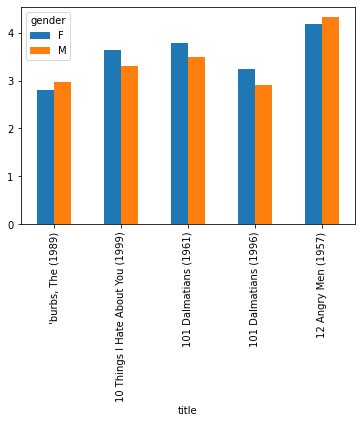

In [12]:
res.head().plot.bar()

In [13]:
m10 = res.head(10).stack()
m10.name='total'
m10

title                                gender
'burbs, The (1989)                   F         2.793478
                                     M         2.962085
10 Things I Hate About You (1999)    F         3.646552
                                     M         3.311966
101 Dalmatians (1961)                F         3.791444
                                                 ...   
20,000 Leagues Under the Sea (1954)  M         3.709205
2001: A Space Odyssey (1968)         F         3.825581
                                     M         4.129738
2010 (1984)                          F         3.446809
                                     M         3.413712
Name: total, Length: 20, dtype: float64

<AxesSubplot:xlabel='total', ylabel='title'>

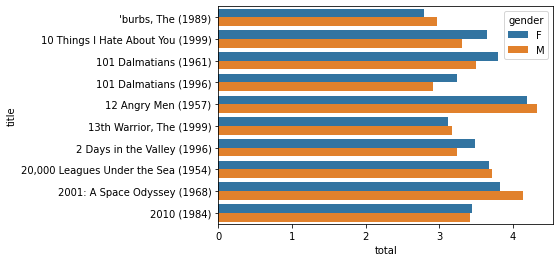

In [15]:
sns.barplot(x='total', y='title', hue='gender', data=m10.reset_index())

In [30]:
res['df'] = res['M'] - res['F']
res['df'] = np.abs(res['df'])
res = res.sort_values(by='df')
res[-5:]

gender,F,M,df
title,,,
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dirty Dancing (1987),3.790378,2.959596,0.830782


In [32]:
df1 = df.copy()
df1

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [37]:
srd_rating = df1.groupby('title')['rating'].std()
srd_rating.loc[ai].sort_values(ascending=False)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: rating, Length: 1214, dtype: float64